Brainstorm: what kind of features do we want to play with?

- 2D (extensible easily to 3D)
- straight edges between but with some alpha/opacity to show accumulation
- multi- simultaneous walks at specifiable starting positions
- coordinate system: Cartesian or polar
- make step size variable based on different probability distributions.

In [228]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import colors as mcolors
colors = dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS)
import random as rn

In [220]:
n_steps = 10 # number of steps in walks
starting_points = [ 
  [1,1], [0,0], [0,-1]
]
coordinate_system = 'cartesian' # 'cartesian' or 'polar'

def iterate(
  coordinate_system='cartesian',
  in_point=[0,0],
  step_size=[1,1],
  prob_distribution='uniform',
  random_seed=None
):
  in_point = np.array(in_point)
  step_size = np.array(step_size)
  dims = len(in_point)
  rn.seed = random_seed
  step = np.zeros(dims)
  if prob_distribution == 'uniform':
    i_rand = rn.choice(range(0,dims))
    step[i_rand] = rn.choice([-1,1])*step_size[i_rand]
  return in_point+step

In [221]:
def walker(
  coordinate_system='cartesian',
  starting_point=[0,0],
  step_type='constant',
  step_size=[1,1],
  n_steps=10,
  random_seed=None,
):
  dim = len(starting_point)
  rn.seed = random_seed
  walk_a = np.zeros([n_steps,dim])
  walk_a[0,:] = np.array(starting_point)
  if step_type == 'constant':
    for i in range(1,n_steps):
      walk_a[i] = iterate(
        coordinate_system=coordinate_system,
        in_point=walk_a[i-1,:],
        step_size=step_size,
        prob_distribution='uniform',
        random_seed=random_seed
      )
  return walk_a

In [222]:
def multi_walker(
  coordinate_system='cartesian',
  starting_points=[[0,0],[1,1]],
  step_type='constant',
  step_sizes=[[1,1],[2,2]],
  n_steps=10,
  random_seed=None,
):
  rn.seed = random_seed
  walks_a = np.zeros([
    n_steps,
    len(starting_points[0]), # dim
    len(starting_points) # number of walks
  ])
  for i in range(0,len(starting_points)):
    walks_a[:,:,i] = walker(
      coordinate_system=coordinate_system,
      starting_point=starting_points[i],
      step_type=step_type,
      step_size=step_sizes[i],
      n_steps=n_steps,
      random_seed=random_seed,
    )
  return walks_a

In [223]:
a = multi_walker(
  n_steps=10,
  starting_points=[[-10,-10],[0,0],[10,10]],
  step_sizes=[[2,1],[2,1],[2,1]]
)

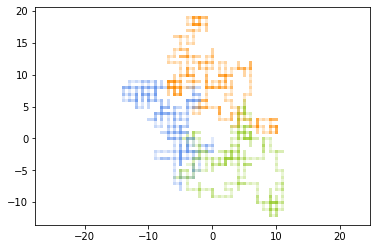

In [235]:
c_array = [colors['yellowgreen'],colors['cornflowerblue'],colors['darkorange']]
a = multi_walker(
  n_steps=300,
  starting_points=[[-4,-4],[0,0],[4,4]],
  step_sizes=[[1,1],[1,1],[1,1]]
)
fig, ax = plt.subplots()
for i in range(0,np.shape(a)[0]-1):
  for j in range(0,np.shape(a)[2]):
    p = plt.plot(
      [
        a[i,0,j],a[i+1,0,j]
      ],[
        a[i,1,j],a[i+1,1,j]
      ],
      '-',color=c_array[j],alpha=.2,linewidth=3)
ax.axis('equal')
plt.savefig('cool_walk_bro.png',dpi=600)
# plt.savefig('cool_walk_bro.pdf')